In [9]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import heapq

In [10]:
data = pd.read_csv('titanic.csv')
data=data.drop(['PassengerId'], axis = 1)
#scaling the data
data.loc[data.Sex == "male", "Sex"] = 0
data.loc[data.Sex == "female", "Sex"] = 1
data.loc[data.Embarked == "S", "Embarked"] = 0
data.loc[data.Embarked == "C", "Embarked"] = 2
data.loc[data.Embarked == "Q", "Embarked"] = 1
data['Age'].fillna((data['Age'].mean()), inplace=True)
print(data)

     Survived  Pclass Sex   Age  SibSp  Parch     Fare Cabin Embarked
0           0       3   0  22.0      1      0   7.2500   C80        0
1           1       1   1  38.0      1      0  71.2833   C85        2
2           1       3   1  26.0      0      0   7.9250   B29        0
3           1       1   1  35.0      1      0  53.1000  C123        0
4           0       3   0  35.0      0      0   8.0500   D10        0
..        ...     ...  ..   ...    ...    ...      ...   ...      ...
226         0       3   0  47.0      0      0   9.0000   B53        0
227         0       3   0  20.0      0      0   9.8458   B55        0
228         1       1   1  56.0      0      1  83.1583   C50        2
229         1       1   1  19.0      0      0  30.0000   B42        0
230         1       1   0  26.0      0      0  30.0000  C148        2

[231 rows x 9 columns]


In [11]:
train_data, test_data = train_test_split(data, test_size=0.4)
print("size of Data = ",len(data))
print("size of train_data = ",len(train_data))
print("size of test_data = ",len(test_data))

size of Data =  231
size of train_data =  138
size of test_data =  93


In [12]:
def hamming_cabin(a,b):
    diff=abs(len(a)-len(b)) #if two strings lengths are different then add  difference of two strings to distance
    m=min(len(a),len(b))
    count=0
    for i in range(m):
        if(a[i] != b[i]):
            count += 1
    return count+diff

In [13]:
def euclidean(a,b): 
    d=0 
    for i in range(1,len(a)):
        if(type(a[i]) == str): #for cabin we find hamming distance
            d+=hamming_cabin(a[7],b[7])
        else:
            d += (a[i] - b[i])**2
    return (d**0.5,b[0]) # adding training label to distance for checking accuracy

In [14]:
K=[]
accuracy=[]
for k in range(1,31):
    K.append(k)
    success=0
    for index, rows in test_data.iterrows():
        l=list(rows)
        distance=[]
        for index,rows in train_data.iterrows():
            m=list(rows)
            distance.append(euclidean(l,m))
        heapq.heapify(distance)
        k_distance=[]
        for m in range(0,k):
            k_distance.append(heapq.heappop(distance))
        count=0;
        for m in range(0,len(k_distance)):
            if(k_distance[m][1]==0):
                count+=1
        if(count>(k//2) and l[0]==0):
            success+=1
        elif(l[0]==1):
            success+=1
    accuracy.append(success/len(test_data))

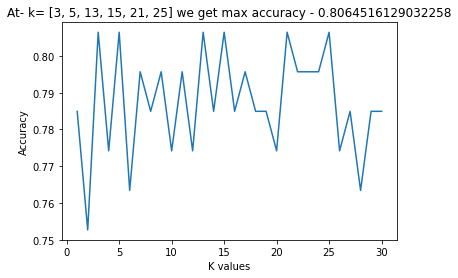

In [15]:
m=max(accuracy)
l=[K[i] for i,val in enumerate(accuracy) if val==m]
plt.plot(K,accuracy)
plt.xlabel("K values")
plt.ylabel("Accuracy")
s="At- k= "+str(l)+" we get max accuracy - "+str(m)
plt.title(s)
plt.show() 

In [16]:
for i in range(len(K)):
    print("At K= ",K[i]," Accuracy is ",accuracy[i])

At K=  1  Accuracy is  0.7849462365591398
At K=  2  Accuracy is  0.7526881720430108
At K=  3  Accuracy is  0.8064516129032258
At K=  4  Accuracy is  0.7741935483870968
At K=  5  Accuracy is  0.8064516129032258
At K=  6  Accuracy is  0.7634408602150538
At K=  7  Accuracy is  0.7956989247311828
At K=  8  Accuracy is  0.7849462365591398
At K=  9  Accuracy is  0.7956989247311828
At K=  10  Accuracy is  0.7741935483870968
At K=  11  Accuracy is  0.7956989247311828
At K=  12  Accuracy is  0.7741935483870968
At K=  13  Accuracy is  0.8064516129032258
At K=  14  Accuracy is  0.7849462365591398
At K=  15  Accuracy is  0.8064516129032258
At K=  16  Accuracy is  0.7849462365591398
At K=  17  Accuracy is  0.7956989247311828
At K=  18  Accuracy is  0.7849462365591398
At K=  19  Accuracy is  0.7849462365591398
At K=  20  Accuracy is  0.7741935483870968
At K=  21  Accuracy is  0.8064516129032258
At K=  22  Accuracy is  0.7956989247311828
At K=  23  Accuracy is  0.7956989247311828
At K=  24  Accuracy 